In [61]:
import pandas as pd


df_final = pd.read_csv("/Users/loicalix-brown/OneDrive/FYP/Coding/DF/df_final_grid.csv")

In [62]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline 
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from numpy import ravel
import numpy as np



In [63]:
for i in range (len(df_final)):
    if (df_final.churned[i] > 1):
        df_final.churned[i] = 1

In [64]:
y = df_final.churned.value_counts()
print(y)

0.0    2604
1.0    1735
Name: churned, dtype: int64


In [65]:
X = df_final.iloc[:,-30:-2].values
print(X)

Y = df_final.iloc[:,-2:-1].values
print(Y)

[[ 8.         8.         2.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         2.         0.       ]
 [20.         0.         9.        ...  0.         0.         0.       ]
 ...
 [ 2.         0.        34.        ...  0.         0.1767767  0.1767767]
 [ 0.         0.         0.        ...  0.         0.25       0.       ]
 [21.         0.         2.        ...  0.         0.25       0.       ]]
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [66]:
xTrain_lr, xTest_lr, yTrain_lr, yTest_lr = train_test_split(X, Y, test_size = 1/3, random_state = 8)

In [67]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_res, Y_res = ros.fit_resample(xTrain_lr, yTrain_lr)
xTrain_lr = X_res
yTrain_lr = Y_res


/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xTrain_lr,yTrain_lr)

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
yPred_lr=logreg.predict(xTest_lr)

In [70]:
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(yTest_lr, yPred_lr))

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.82       848
         1.0       0.82      0.55      0.66       599

    accuracy                           0.76      1447
   macro avg       0.78      0.73      0.74      1447
weighted avg       0.77      0.76      0.75      1447



In [75]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params = {
     'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]
        }

param_comb = 50
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 1001)
logreg = LogisticRegression(max_iter = 1000)
model = RandomizedSearchCV(logreg, param_distributions=params, n_iter=param_comb, scoring='neg_brier_score', n_jobs=4, cv=3, verbose=3, random_state=1001 )
search = model.fit(xTrain_lr, yTrain_lr)

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Done  41 out of  48 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:    0.8s finished


In [77]:
search.best_params_

{'penalty': 'l2', 'C': 10}

In [78]:
search.best_score_

-0.17774904752111273

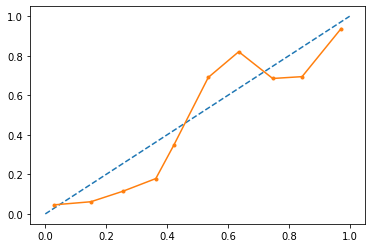

In [94]:
predictions = logreg.predict_proba(xTest_lr)[:,1]
# reliability diagram
fop, mpv = calibration_curve(yTest_lr, predictions, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 10, max_iter = 1000)
logreg.fit(xTrain_lr,yTrain_lr)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

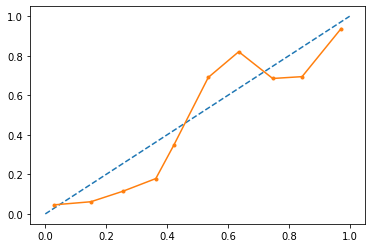

In [96]:
predictions = logreg.predict_proba(xTest_lr)[:,1]
# reliability diagram
fop, mpv = calibration_curve(yTest_lr, predictions, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [97]:
brier_score_loss(yTest_lr, predictions)

0.1761807762771195

In [98]:
calibrated = CalibratedClassifierCV(logreg, method='isotonic', cv=5)
calibrated.fit(xTrain_lr, (yTrain_lr))

CalibratedClassifierCV(base_estimator=LogisticRegression(C=10,
                                                         class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=1000,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                              

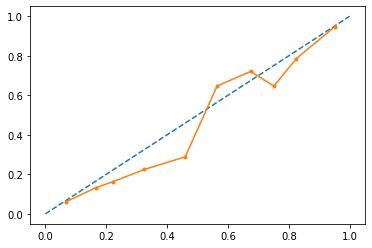

In [101]:
probs = calibrated.predict_proba(xTest_lr)[:, 1]

# reliability diagram
fop, mpv = calibration_curve(yTest_lr, probs, n_bins=10, normalize=False)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [102]:
brier_score_loss(yTest_lr, probs)

0.14274302097799316